In [1]:
import torch
import src
from src.lstm_ed import LSTM_ED

In [2]:
use_cuda = torch.cuda.is_available()
if use_cuda:
    print('__CUDNN VERSION:', torch.backends.cudnn.version())
    print('__Number CUDA Devices:', torch.cuda.device_count())
    print('__CUDA Device Name:',torch.cuda.get_device_name(0))
    print('__CUDA Device Total Memory [GB]:',torch.cuda.get_device_properties(0).total_memory/1e9)
device = torch.device("cuda" if use_cuda else "cpu")
print("Device: ", device)

Device:  cpu
/home/stachu/anaconda3/envs/dl/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [3]:
from sklearn.preprocessing import LabelEncoder
from datasets import ucr_2018, utils

train_df, test_df = ucr_2018.get_dataset("ECG200")
X_train, y_train = utils.x_y_split(train_df, y_col=0)
X_test, y_test = utils.x_y_split(test_df, y_col=0)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [4]:
params = {
    'batch_size': 10,
    'shuffle': True
}

train = torch.utils.data.TensorDataset(
    torch.from_numpy(X_train.values).unsqueeze(-1).float().to(device),
    torch.tensor(y_train).to(device)
)
train_loader = torch.utils.data.DataLoader(train, **params)

test = torch.utils.data.TensorDataset(
    torch.from_numpy(X_test.values).unsqueeze(-1).float().to(device),
    torch.tensor(y_test).to(device)
)
test_loader = torch.utils.data.DataLoader(test, **params)

In [5]:
epochs = 10
model = LSTM_ED(input_size=1, seq_len=96, device=device)
model.train(train_loader=train_loader, validation_loader=None,
            data_storage="records", epochs=epochs, model_name="LSTM-ED",
            logdir="logs", verbose=1)

Epoch 0, dataset train: Loss - 0.989218, MSE - 0.989299
Epoch 1, dataset train: Loss - 0.988826, MSE - 0.989051
Epoch 2, dataset train: Loss - 0.988469, MSE - 0.988714
Epoch 3, dataset train: Loss - 0.988016, MSE - 0.988422
Epoch 4, dataset train: Loss - 0.987622, MSE - 0.988140
Epoch 5, dataset train: Loss - 0.987056, MSE - 0.987626
Epoch 6, dataset train: Loss - 0.986263, MSE - 0.987052
Epoch 7, dataset train: Loss - 0.985318, MSE - 0.986576
Epoch 8, dataset train: Loss - 0.983847, MSE - 0.985356
Epoch 9, dataset train: Loss - 0.981530, MSE - 0.984563


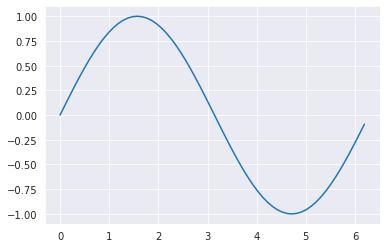

In [6]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 32*np.pi, 1024)# np.arange(0, 32*np.pi, np.pi/20)
y = np.sin(x)
plt.plot(x[:64], y[:64]);

In [7]:
train = torch.utils.data.TensorDataset(
    torch.tensor(y).unsqueeze(-1).float().to(device),
    torch.zeros(len(y))
)
train_loader = torch.utils.data.DataLoader(train)

In [8]:
epochs = 10
model = LSTM_ED(input_size=1, seq_len=64, device=device)
model.train(train_loader=train_loader, validation_loader=None,
            data_storage="single", epochs=epochs, model_name="LSTM-ED",
            logdir="logs", verbose=1)

RuntimeError: input must have 3 dimensions, got 2

# Brudnopis

In [ ]:
None=1

In [ ]:
#!rm -rf ./logs/LSTM-ED

In [ ]:
rnn = nn.LSTM(1, 20, 1)  # (features_size, hidden_size, n_layers)
input = torch.randn(10, 96, 1)  # (batch_size, seq_len, features_size)
h0 = torch.randn(1, 96, 20)  # (n_layers, seq_len, hidden_size)
c0 = torch.randn(1, 96, 20)  # (n_layers, seq_len, hidden_size)
output, (hn, cn) = rnn(input, (h0, c0))  # (batch_size, seq_len, hidden_size)
hn.shape